## matplotlib playground

### iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
def gen_data_iris():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target
    
    return X, y

def build_model():
    C = 1.
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)
    
    return svc, rbf_svc, poly_svc, lin_svc

h = 0.02
X, y = gen_data_iris()
x_min, x_max = X[:, 0].min() - 1., X[:, 0].max() + 1.
y_min, y_max = X[:, 1].min() - 1., X[:, 1].max() + 1.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

models = build_model()
print 'X.shape: {0}, y.shape: {1}'.format(X.shape, y.shape)
print 'xx.shape: {0}, yy.shape: {1}'.format(xx.shape, yy.shape)

X.shape: (150, 2), y.shape: (150,)
xx.shape: (220, 280), yy.shape: (220, 280)


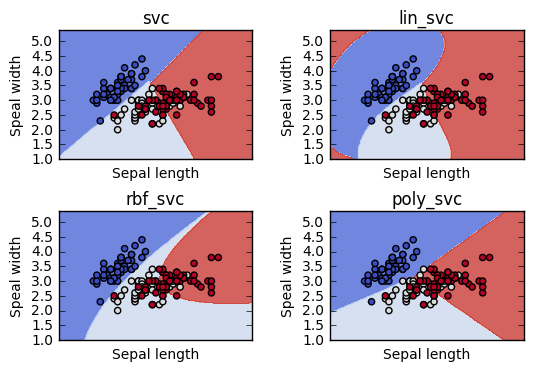

In [3]:


titles = ['svc', 'lin_svc', 'rbf_svc', 'poly_svc']
for i, clf in enumerate(models):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Speal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.title(titles[i])

    
plt.show()

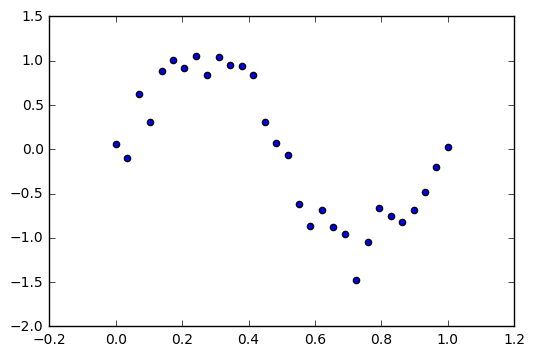

In [11]:
x = np.linspace(0, 1, 30)
y = np.sin(2*np.pi*x) + np.random.randn(30)*0.2
plt.scatter(x, y)
plt.savefig('./sin.png')
plt.show()